การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 8 การควบคุมเหมาะที่สุดแบบสโทแคสติก

จากการศึกษาในบทที่ผ่านมา เราตั้งสมมุติฐานว่าทุกสิ่งทุกอย่างบนโลกนี้เป็นแบบเชิงกำหนด ทำให้สามารถพยากรณ์ค่าในอนาคตได้อย่างแม่นยำ
ซึ่งในความเป็นจริงไม่เป็นเช่นนั้น ค่าที่วัดได้จากเซนเซอร์มีการรบกวนจากภายนอก รวมถึงความไม่แม่นยำของตัวเซนเซอร์เอง 
เราสามารถโมเดลการรบกวนเหล่านี้เป็นค่าสุ่ม ทำให้กลายเป็นปัญหา 
*การควบคุมเหมาะที่สุดแบบสโทแคสติก (stochastic optimal control)* ที่เป็นเนื้อหาหลักของบทนี้ 
ในการศึกษาจะเริ่มจากภาพรวมของปัญหาสโทแคสติก 
ลงสู่กรณีพิเศษเมื่อประมาณค่าพลวัตเป็นเชิงเส้นและใช้ตัวควบคุมที่เสมือนเป็นการขยายจากวิธีการที่ใช้ในระบบเชิงกำหนด 

ปัญหาสโทแคสติกโดยรวมครอบคลุมเนื้อหาที่กว้างมากและเป็นพื้นฐานของการเรียนรู้เสริมกำลัง 
ความรู้ในบทนี้เป็นเพียงฐานเพื่อต่อยอดไปยังแนวทางตามที่ต้องการ

## 8.1 ปัญหาการควบคุมแบบสโทแคสติก

ในการควบคุมก่อนหน้านี้เราสมมุติว่าทราบสถานะของระบบโดยสมบูรณ์ (ค่าผิดพลาดจากการโมเดลเป็นแบบเชิงกำหนด) คำถามที่สอดคล้องกับความจริงในทางปฎิบัติคือ จะเกิดอะไรขึ้นหากค่าที่วัดได้มีการรบกวนแบบสุ่ม (random noise)?  โดยทั่วไปแล้วเราอาจไม่สามารถวัดค่าสถานะทั้งหมดได้ ดังนั้นนิยามค่าจากการวัด $y$ เป็นฟังก์ชันของสถานะ $x$ และการรบกวน $v$
$$
y = g(x,v) \tag{8.1}
$$
กล่าวคือในระบบเชิงกำหนดเราทราบสถานะ $x$ อย่างถูกต้องสมบูรณ์และใช้ในตัวควบคุมป้อนกลับ แต่สำหรับระบบสโทแคสติก เราทราบเพียงค่าจากการวัด $y$ ดังนั้นต้องใช้ฟังก์ชันความหนาแน่น (density function) $p(x|y)$ คือความน่าจะเป็นในการประมาณค่า $x$ เมื่อกำหนดค่า $y$ 

**หมายเหตุ :** ศัพท์ที่ใช้เรียก $y$ คือ POMDP ย่อมาจากกระบวนการตัดสินใจมาร์คอฟที่สังเกตได้บางส่วน (Partially-Observed Markov Decision Process) 

นิยามปัญหาการควบคุมเหมาะที่สุดแบบสโทแคสติกได้ดังนี้
$$
\underset{u}{min} \; E[J(x,u)] \tag{8.2}
$$
โดย $E[.]$ แทนค่าคาดหมาย (expected value) แม้ว่าโดยหลักการแล้วเราสามารถแก้ปัญหาสโทแคสติกได้โดยใช้เครื่องมือเช่น 
DP หลังจากที่ครอบโดย $E[.]$ แล้วก็ตาม แต่ในกรณีทั่วไปปัญหาจะยากขึ้นมากจากฟังก์ชันความหนาแน่น 
ยกเว้นในกรณีที่เป็นแบบเกาส์เซียน 
เพราะสามารถแยกพารามิเตอร์เป็นเวกเตอร์ของค่าเฉลี่ยและเมทริกซ์ความแปรปรวนร่วมเกี่ยว (covariance)

### 8.1.1 ตัวควบคุมกำลังสองเชิงเส้นแบบเกาส์เซียน

กรณีพิเศษของการควบคุมแบบสโทแคสติกที่สามารถหาคำตอบในรูปปิดได้มีชื่อเรียกว่า *ตัวควบคุมกำลังสองเชิงเส้นแบบเกาส์เซียน (Linear Quadratic Gaussian)* ต่อไปจะเรียกโดยย่อว่า LQG 
พิจารณาได้เป็นการขยายจากตัวควบคุม LQR ที่ใช้มาโดยตลอดในระบบเชิงกำหนด 

การศึกษา LQG จะง่ายกว่าในระบบดีสครีต ซึ่งเป็นทางเลือกที่ใช้ในบทนี้ 

<u>**พลวัต**</u>

พลวัตเชิงเส้นประกอบด้วยสมการสถานะและเอาต์พุตดังนี้
$$
\begin{align*}
x_{k+1} &= Ax_k + Bu_k +w_k \\
y_{k} &= Cx_k + v_k
\end{align*} \tag{8.3}
$$
สิ่งที่เพิ่มเข้ามาคือการรบกวนกระบวนการ (process noise) $w_k$ และการรบกวนจากการวัด (measurement noise) $v_k$ สำหรับปัญหา LQG จะตั้งสมมุติฐานว่าการรบกวนทั้งหมดเป็นแบบเกาส์เซียน $w_k \sim N(0,W),\; v_k \sim N(0,V)$ เครื่องหมาย $\sim$ หมายความว่าตัวอย่างทางด้านซ้ายถูกสุ่มจากฟังก์ชันการแจกแจงทางด้านขวา  โดย $N(\mu, \Phi)$ แทนการแจกแจงแบบปรกติ (normal distribution) มีค่าเฉลี่ย $\mu$ และเมทริกซ์ความแปรปรวนร่วมเกี่ยว $\Phi$ ฟังก์ชันความหนาแน่นความน่าจะเป็นแบบเกาส์เซียน $n$ ตัวแปรเขียนได้ดังนี้
$$
p(x) = \frac{1}{\sqrt{(2\pi)^ndet(S)}}exp(-\frac{1}{2}(x-\mu)^TS^{-1}(x-\mu)) \tag{8.4}
$$
โดยมีค่าเฉลี่ย
$$
\mu = \hat{x} = E[x] \in \mathbb{R}^n \tag{8.5}
$$
และเมทริกซ์ความแปรปรวนร่วมเกี่ยว
$$
S = E[(x-\mu)(x-\mu)^T] \in \mathbf{S}_{++}^n \tag{8.6}
$$
สัญกรณ์ $\mathbf{S}_{++}^n$ แทนเซตของเมทริกซ์สมมาตรที่เป็นบวกแน่นอนขนาด $n \times n$ 

ค่าคาดหมายของฟังก์ชัน $f(x)$ นิยามได้ดังนี้
$$
E[f(x)] = \int f(x)p(x)dx \tag{8.7}
$$
โดยปริพันธ์ครอบคลุมปริภูมิทั้งหมด

เรากำหนดค่าเฉลี่ยเป็นศูนย์สำหรับการรบกวนโดยไม่เสียความเป็นทั่วไป  เพราะหากไม่เป็นศูนย์มีวิธีที่จะประมาณค่าเฉลี่ยและหักลบออกได้ นอกจากนั้นยังตั้งสมมุติฐานว่าการรบกวนเป็นแบบ i.i.d (independently and identically distributed) หมายความว่าค่าสุ่มเป็นอิสระจากสถานะและตัวควบคุม 

**หมายเหตุ :** ในทางปฏิบัติอาจมีกรณีที่ทำให้สมมุติฐาน i.i.d ไม่เป็นจริง ตัวอย่างเช่นโดรนอาจได้รับสัญญาณรบกวนมากขึ้นเมื่อบินใกล้ตัวกำเนิดสนามแม่เหล็กไฟฟ้าเช่นหม้อแปลงขนาดใหญ่ แต่โดยทั่วไปผลกระทบจะน้อยจนสามารถละทิ้งได้

<u>**ฟังก์ชันมูลค่า**</u>

กำหนดฟังก์ชันมูลค่าของปัญหา LQG ได้คล้ายกับ LQR เพียงครอบทั้งหมดด้วยค่าคาดหมาย
$$
J = E\Bigg[\frac{1}{2}x_N^TQ_Nx_N + \frac{1}{2}\sum_{k=1}^{N-1}(x_k^TQx_k + u_k^TRu_k)\Bigg] \tag{8.8}
$$
ใช้การเรียกซ้ำ DP เช่นเดียวกับกรณี LQR เริ่มจากขั้นเวลาปลาย $N$ คำนวณมูลค่าของหนึ่งขั้นก่อนหน้าคือ $N-1$
$$
\begin{align*}
V_N(x) =& \frac{1}{2}E\Big[x_N^TQ_Nx_N\Big] = \frac{1}{2}E\Big[x_N^TP_Nx_N\Big] \\
V_{N-1}(x) =& \underset{u}{min} \; E\Bigg[\frac{1}{2}x_{N-1}^TQx_{N-1} + \frac{1}{2}u^TRu \\
&+ \frac{1}{2}(Ax_{N-1}+Bu + w_{N-1})^TP_N(Ax_{N-1}+Bu + w_{N-1})\Bigg] 
\end{align*}
$$
กระจายพจน์สุดท้ายและจัดเรียงใหม่เพื่อแยกพจน์ที่มีและไม่มีการรบกวนออกจากกัน (เนื่องจาก $E[.]$ คือการดำเนินการเชิงเส้น ดังนั้นเราสามารถดึงพจน์เข้าหรือออกได้)
$$
\begin{align*}
V_{N-1}(x)=& \underset{u}{min} \; E\Bigg[\frac{1}{2}x_{N-1}^TQx_{N-1} + \frac{1}{2}u^TRu + (Ax_{N-1}+Bu )^TP_N(Ax_{N-1}+Bu)\Bigg] \\
&+ E\Bigg[(Ax_{N-1}+Bu)^TP_Nw_{N-1} + w_{N-1}^TP_N(Ax_{N-1}+Bu)+ w_{N-1}^TP_Nw_{N-1}\Bigg] \tag{8.9}
\end{align*}
$$
สังเกตว่าบรรทัดบนของ (8.9) เหมือนกับ LQR มาตรฐาน สำหรับสามพจน์ที่มีการรบกวนในบรรทัดล่าง พจน์ที่หนึ่งและสองที่เป็นสหสัมพันธ์ข้าม (cross correlation) ระหว่างการรบกวนกับสถานะ/ตัวควบคุมจะมีค่าเป็นศูนย์ ทั้งนี้เพราะ ณ ขั้นเวลา $k$ สถานะ $x_k$ หรือตัวควบคุม $u_k$ ไม่มีความสัมพันธ์กับ $w_k$ (หรืออาจพิจารณาว่าถ้าดึงค่าที่ไม่เกี่ยวข้องกับการรบกวนออก จะเหลือพจน์ $E[w_{N-1}]$ ซึ่งมีค่าเฉลี่ยเป็นศูนย์) ส่วนพจน์ที่สามจะเป็นค่าคงที่

สรุปจาก (8.9) ได้ว่าพจน์การรบกวนไม่มีผลกับการคำนวณหาคำตอบตัวควบคุมเหมาะที่สุด เพราะเป็นเพียงทำให้ฟังก์ชันมูลค่าสูงขึ้นเท่านั้น 

จากการอนุพัทธ์นี้ได้เป็นสองหลักการที่สำคัญด้านทฤษฎีระบบควบคุม คือ

<hr>

**หลักการการสมมูลของความแน่นอน (certainty-equivalence principle)** 

ตัวควบคุมเหมาะที่สุดสำหรับปัญหาสโทแคสติก LQG มีโครงสร้างเดียวกับตัวควบคุมเหมาะที่สุดสำหรับปัญหาเชิงกำหนด LQR เพียงแต่แทนที่สถานะ $x$ ด้วยค่าคาดหมาย $E[x]$

<hr>

**หลักการการแบ่งแยก (separation principle)** 

สำหรับตัวควบคุม LQG เราสามารถออกแบบตัวควบคุมป้อนกลับเหมาะที่สุดและตัวประมาณค่าสถานะเหมาะที่สุดแยกกันได้ หลังจากนั้นจึงใช้งานร่วมกัน นโยบายป้อนกลับที่ได้จะเหมาะที่สุด

<hr>

แม้ว่าสองหลักการนี้ไม่เป็นจริงในกรณีทั่วไป แต่ในทางปฏิบัติถูกใช้อยู่เสมอในการออกแบบนโยบายควบคุมเหมาะที่สุดรองลงมา (sub-optimal)

### 8.1.2 การประมาณค่าสถานะเหมาะที่สุด

จากปัญหาการควบคุมแบบสโทแคสติก ตามสมการ (8.1) เราทราบเพียงค่าจากการวัด $y$ ที่รวมการรบกวน ต้องการประมาณค่าสถานะ $\hat{x}$ 
ที่เป็นตัวแทนเหมาะที่สุดของสถานะจริง $x$ โดยใช้ *ตัวประมาณค่าสถานะ (state estimator)* ซึ่งสามารถสร้างขึ้นได้โดยวิธีการเช่น 
การวางโพล​ (pole placement) โดยอาศัยหลักการการแบ่งแยกและนำมาใช้กับตัวควบคุมป้อนกลับสถานะที่ออกแบบแยกกัน 
ตัวประมาณค่าสถานะโดยทั่วไปอาจเรียกว่า ตัวสังเกต (observer) หรือ Luenberger observer ตามผู้ให้กำเนิดคือ 
David G. Luenberger [3] แต่ในปัญหา LQG เราต้องการหาตัวประมาณค่าสถานะเหมาะที่สุด

รูปที่ 8.1 แสดง 2 วิธีในการหาค่าสถานะเหมาะที่สุดจากฟังก์ชันการแจกแจงความน่าจะเป็น

1. Maximum a-posteriori (MAP) : $argmax \; p(x|y)$ โดย $p(x|y)$ คือความน่าจะเป็นของสถานะ $x$ เมื่อกำหนดค่าจากการวัด $y$

2. Minimum mean-squared error (MMSE) : $\underset{\hat{x}}{argmin} \; E[(x-\hat{x})^T(x-\hat{x})]$

โดยในกรณีฟังก์ชันแจกแจงทั่วไป (a) MAP และ MMSE จะให้ค่าที่แตกต่างกัน ซึ่งต้องพิจารณาเลือกวิธีที่เหมาะสมสำหรับปัญหา แต่สำหรับฟังก์ชันการแจกแจงแบบเกาส์เซียน ทั้งสองวิธีจะให้ผลเหมือนกัน ดังนั้นจะเลือกวิธี MMSE ที่เรียกอย่างอื่นได้ว่า วิธีกำลังสองน้อยสุด (least square) หรือ วิธีความแปรปรวนต่ำสุด (minimum variance)

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch8_map_mmse.png" width=800 />
</div>
<div align="center">
รูปที่ 8.1 การหาค่าเหมาะที่สุดจากฟังก์ชันแจกแจงความน่าจะเป็น
</div>

กลเม็ดที่จะใช้ในการอนุพัทธ์ต่อไปคือ เมื่อพิจารณา $E[(x-\hat{x})^T(x-\hat{x})]$ เป็นจำนวนสเกลาร์ ดังนั้นดำเนินการดังนี้
<br>1. เพิ่มฟังก์ชัน $tr()$ คือรอย (trace) ได้โดยค่าไม่เปลี่ยนแปลง 
<br>2. ใช้หลักการ $tr(x^Tx) = tr(xx^T)$ 
<br>3. สลับตำแหน่งระหว่าง $E[.]$ กับ $tr()$ 

$$
\begin{align*}
E[(x-\hat{x})^T(x-\hat{x})] &= E[tr((x-\hat{x})^T(x-\hat{x}))] \\
&= E[tr((x-\hat{x})(x-\hat{x})^T)] \\
&= tr(E[(x-\hat{x})(x-\hat{x})^T]) \\
&= tr(\Sigma) \tag{8.10}
\end{align*}
$$

ผลที่ได้คือรอยของเมทริกซ์ความแปรปรวนร่วมเกี่ยว

### 8.1.3 ตัวกรองคาลมาน

ตัวประมาณค่าเหมาะที่สุดที่ใช้ในปัญหา LQG จะรู้จักกันดีในชื่อ *ตัวกรองคาลมาน (Kalman filter)* ตามชื่อของ R.E. Kalman [4] ผู้เริ่มต้นระบบควบคุมสมัยใหม่ที่ใช้การบรรยายปริภูมิสถานะ เพื่อความกระชับต่อไปจะเรียกตัวกรองคาลมานโดยย่อว่า KF

การอนุพัทธ์ตัวกรองคาลมานทำได้หลายวิธี เช่นวิธีทางเรขาคณิตที่ใช้ในบทความ [4]ในหัวข้อนี้จะใช้วิธี MMSE เชิงเส้นแบบเวียนเกิด (recursive) คือปรับค่าของการประมาณค่าทุกขั้นเวลา แตกต่างจากวิธีแบบกลุ่ม (batch) 
ที่ประมวลผลข้อมูลทั้งหมดในครั้งเดียวแบบออฟไลน์ 

แนวคิดของวิธีนี้คือ สมมุติการประมาณค่าของสถานะปัจจุบัน ณ ขั้นเวลา $k$ ที่รวมข้อมูลจากการวัดทั้งหมดจนถึงขั้นเวลาปัจจุบัน
$$
\hat{x}_{k|k} = E\big[x_k|y_{1:k}\big] \tag{8.11}
$$
และสมมุติว่าเราทราบความแปรปรวนร่วมเกี่ยวของค่าผิดพลาด
$$
\Sigma_{k|k} = E\big[(x_k - \hat{x}_{k|k})(x_k - \hat{x}_{k|k})^T\big] \tag{8.12}
$$
เราต้องการปรับค่า $\hat{x}$ และ $\Sigma$ เมื่อมีค่าวัดใหม่ที่ขั้นเวลา $t_{k+1}$ สามารถแยก KF ออกเป็น 2 ขั้นดังนี้

**1. <u>ขั้นการทำนาย (prediction)</u>**

ในขั้นนี้แนวคิดคือใช้โมเดลพลวัตเพื่อแผ่การแจกแจง 1 ขั้น โดยไม่มีค่าจากการวัด ดังนั้นทั้งหมดขึ้นกับค่าการวัดในขั้นก่อนหน้า 
$$
\begin{align*}
\hat{x}_{k+1|k} &= E\big[Ax_k + Bu_k + w_k|y_{1:k}\big] \\
&= A\hat{x}_{k|k} + Bu_k \tag{8.13}
\end{align*}
$$
บรรทัดที่สองได้จาก $u_k$ ไม่ใช่ค่าสุ่ม และ $w_k$ เป็นค่าสุ่มแบบเกาส์เซียนมีค่าเฉลี่ยเป็นศูนย์ (8.13) คือการทำนายสถานะ
ต่อมาคือการทำนายความแปรปรวนร่วมเกี่ยว
$$
\begin{align*}
\Sigma_{k+1|k} &= E\big[(x_{k+1}-\hat{x}_{k+1|k})(x_{k+1}-\hat{x}_{k+1|k})^T\big] \\
&= E\big[(Ax_k + Bu_k +w_n -A\hat{x}_{k|k}-Bu_k)(Ax_k + Bu_k +w_n -A\hat{x}_{k|k}-Bu_k)^T\big] \\
&= AE\big[(x_k - \hat{x}_{k|k})(x_k - \hat{x}_{k|k})^T\big]A^T + E\big[w_kw_k^T\big] \\
&= A\Sigma_{k|k}A^T + W \tag{8.14}
\end{align*}
$$
อธิบายรายละเอียดการอนุพัทธ์ ในบรรทัดที่สองเมื่อแทนค่าพลวัต จะเห็นว่า
พจน์ $Bu_k$ หักล้างกัน บรรทัดที่ 3 เมื่อคูณพจน์เข้าด้วยกันและใช้หลักความจริงว่า $x_k$ และ $w_k$ ไม่สัมพันธ์กัน (uncorrelated) ดังนั้นพจน์ที่เป็นสหสัมพันธ์ข้ามเป็นศูนย์ แยกพจน์การรบกวน $w_k$ ออกและดึงเมทริกซ์ $A$ และ $A^T$ ออกจาก $E[.]$ จะได้เป็นเมทริกซ์ความแปรปรวนร่วมเกี่ยวในบรรทัดที่ 4 โดย $W \triangleq E\big[w_kw_k^T\big]$ 

**2. <u>ขั้นปรับค่าการวัด (measurement update)</u>**

ในขั้นที่สอง นิยาม *อินโนเวชัน (innovation)* เป็นความแตกต่างระหว่างค่าวัดจริงกับค่าวัดจากการทำนาย 
$$
\begin{align*}
z_{k+1} &= y_{k+1} - C\hat{x}_{k+1|k} \\
&= Cx_{k+1} + v_{k+1} - C\hat{x}_{k+1|k} \tag{8.15}
\end{align*}
$$
คำนวณความแปรปรวนร่วมเกี่ยวของอินโนเวชันได้เป็น
$$
\begin{align*}
S_{k+1} &= E\Big[z_{k+1}z_{k+1}^T\Big] \\
&= E\Big[(Cx_{k+1}+v_{k+1}-C\hat{x}_{k+1|k})(Cx_{k+1}+v_{k+1}-C\hat{x}_{k+1|k})^T\Big] \tag{8.16}
\end{align*}
$$
เมื่อใช้หลักการพจน์สหสัมพันธ์ข้ามเป็นศูนย์เนื่องจาก $v_{k+1}$ และ $x_{k+1}$ ไม่สัมพันธ์กัน
$$
\begin{align*}
S_{k+1} &= CE\Big[(x_{k+1}-\hat{x}_{k+1|k})(x_{k+1}-\hat{x}_{k+1|k})^T\Big]C^T + E\Big[v_{k+1}v_{k+1}^T\Big] \\
& = C\Sigma_{k+1|k}C^T + V \tag{8.17}
\end{align*}
$$
อินโนเวชันเป็นศัพท์ทางด้านการประมวลสัญญาณที่ใช้กับการออกแบบตัวกรองทั่วไป  สรุปได้ว่าเป็นค่าผิดพลาดในการทำนายที่จะป้อนกลับให้ตัวกรองคาลมานเพื่อควบคุมการประมาณค่า
ดังนั้นการปรับค่าสถานะโดยใช้อินโนเวชันเขียนได้เป็นดังนี้
$$
\hat{x}_{k+1|k+1} = \hat{x}_{k+1|k} + L_{k+1}z_{k+1} \tag{8.18}
$$
โดย $L_{k+1}$ เรียกว่า *อัตราขยายคาลมาน (Kalman gain)*

เพื่อบรรลุวัตถุประสงค์คือต้องการหาค่าเหมาะที่สุดสำหรับอัตราขยายคาลมาน ต้องการการปรับค่าความแปรปรวนร่วมเกี่ยว เมื่อแทนค่า (8.18) และพิจารณาพจน์สหสัมพันธ์ข้ามเป็นศูนย์เนื่องจาก $v_{k+1}$ และ $x_{k+1}$ ไม่สัมพันธ์กัน จะได้เป็น
$$
\begin{align*}
\Sigma_{k+1|k+1} &= E\big[(x_{k+1}-\hat{x}_{k+1})(x_{k+1}-\hat{x}_{k+1})^T\big] \\
&= E\big[(x_{k+1}-\hat{x}_{k+1|k}-L_{k+1}(Cx_{k+1}+v_{k+1}-C\hat{x}_{k+1|k}))(x_{k+1}-\hat{x}_{k+1|k}-L_{k+1}(Cx_{k+1}+v_{k+1}-C\hat{x}_{k+1|k}))^T\big] \\
&= (I - L_{k+1}C)\Sigma_{k+1|k}(I - L_{k+1}C)^T + L_{k+1}VL_{k+1}^T \tag{8.19}
\end{align*}
$$
แม้ว่าในบทความอื่นอาจมีการนำเสนอรูปแบบที่แตกต่างกันไป แต่ผลที่ได้ในบรรทัดสุดท้ายของ (8.19) เรียกว่า *รูปแบบโจเซฟ (Joseph form)* ซึ่งเป็นรูปแบบที่เหมาะสมในทางปฏิบัติ เนื่องจากมีความเป็นสมมาตรและรับประกันความเป็นบวกแน่นอน  

ใช้ (8.19) ในการคำนวณหาอัตราขยายคาลมาน เราใช้วิธีหาค่า MMSE จาก (8.10)
$$
\begin{align*}
MMSE &\Rightarrow \underset{L_{k+1}}{min} \;\; E\Big[(x_{k+1} - \hat{x}_{k+1|k+1})^T(x_{k+1} - \hat{x}_{k+1|k+1})\Big] \\
&\Rightarrow \underset{L_{k+1}}{min} \;\; tr(\Sigma_{k+1|k+1}) \tag{8.20}
\end{align*}
$$
ใช้วิธีที่ได้เคยศึกษามาก่อนหน้านี้ คือกำหนดให้
$$
\frac{\partial tr(\Sigma_{k+1|k+1})}{\partial L_{k+1}} = 0 \tag{8.21}
$$
และหาคำตอบ $L_{k+1}$ (รายละเอียดทิ้งให้เป็นแบบฝึกหัด)
$$
L_{k+1} = \Sigma_{k+1|k}C^TS_{k+1}^{-1} \tag{8.22}
$$

สรุปโครงสร้างของอัลกอริทึมได้ดังนี้

<hr>

<u>**อัลกอริทึม KF**</u> 

1. กำหนดค่าเริ่มต้น $\hat{x}_{0|0}, \Sigma_{0|0}, W, V$ 

วนซ้ำขั้นตอน 2-5

2. ทำนายโดยใช้ (8.13), (8.14)
$$
\begin{align*}
\hat{x}_{k+1|k} &= A\hat{x}_{k|k} + Bu_k \\
\Sigma_{k+1|k} &= A\Sigma_{k|k}A^T + W 
\end{align*}
$$
3. คำนวณอินโนเวชันและความแปรปรวนร่วมเกี่ยวตาม (8.15), (8.17)
$$
\begin{align*}
z_{k+1} &= y_{k+1} - C\hat{x}_{k+1|k} \\
S_{k+1} &= C\Sigma_{k+1|k}C^T + V
\end{align*}
$$
4. คำนวณอัตราขยายคาลมาน (8.22)
$$
L_{k+1} = \Sigma_{k+1|k}C^TS_{k+1}^{-1}
$$
5. ปรับค่าตาม (8.18), (8.19)
$$
\begin{align*}
\hat{x}_{k+1|k+1} &= \hat{x}_{k+1|k} + L_{k+1}z_{k+1} \\
\Sigma_{k+1|k+1} &= (I - L_{k+1}C)\Sigma_{k+1|k}(I - L_{k+1}C)^T + L_{k+1}VL_{k+1}^T
\end{align*}
$$





<hr>




**ตัวอย่าง 8.1** 

ในตัวอย่างนี้จะแสดงการควบคุม LQG สำหรับพลวัตอย่างง่าย 
คือตัวปริพันธ์คู่ที่ใช้ในตัวอย่าง LQR ในบทที่ 3 
เริ่มโดยการนิยามฟังก์ชันและกำหนดเมทริกซ์ $A, B, C$ สำหรับพลวัต 
ตัวแปรกำหนดจำนวนสถานะ ตัวควบคุม จำนวนขั้นเวลาที่ขึ้นกับเวลาปลาย
เมทริกซ์น้ำหนัก $Q, R, Q_N$ สำหรับฟังก์ชันมูลค่า ซึ่งในส่วนนี้จะเหมือนกับในตัวอย่างบทที่ 3 
ยกเว้นรายละเอียดเล็กน้อยเช่นการเพิ่มเมทริกซ์ $C$ ตาม (8.3)

In [1]:
import numpy as np 
from numpy.linalg import norm, solve,inv
import matplotlib.pyplot as plt 
import control as ctl

In [15]:
# discrete dynamics
h = 0.1  # time step
A = np.array([[1,h],[0,1]])
B = np.array([0.5*h*h, h]).reshape(2,1)
C = np.array([1.0,0]).reshape(1,2)

n = 2     # number of state
m = 1     # number of controls
Tfinal = 30.0 # final time 
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

# LQR Cost weights
Q = 1.0*np.eye(2)
R = np.array([[0.1]])
Qn = Q

กำหนดเมทริกซ์ความแปรปรวนร่วมเกี่ยวของการรบกวนการวัดค่าตำแหน่ง $V$ 
และการรบกวนพลวัต $W$ 

In [3]:
# Noise covariances
V = 0.1 #Noise on position measurements
W = 0.1*B@B.T + 1e-5*np.eye(2) #Corresponds to white noise force input to dynamics

ใช้หลักการแบ่งแยกในการออกแบบตัวควบคุม LQR เป็นอิสระจากการประมาณค่าสถานะโดย KF 
หลังจากนั้นจึงประกอบเพื่อใช้งานร่วมกัน

ในส่วนตัวควบคุม LQR ซึ่งเป็นแบบแนวนอนอนันต์ 
ใช้เมธอด dlqr() จาก Python Control Library 
เพื่อคำนวณอัตราขยายป้อนกลับสถานะ $K$

In [5]:
K,_,_ = ctl.dlqr(A,B,Q,R)

กำหนดค่าเริ่มต้นของสถานะจริง $x_0$ สถานะจากการประมาณค่า $\hat{x}_0$ 
และค่าเริ่มต้นของเมทริกซ์ความแปรปรวนร่วมเกี่ยว $\Sigma_0$

In [6]:
x0 = np.array([[1.0],[0]]) # true state
xhat0 = np.array([[0.0],[0.0]]) # KF state
sigma0 = 1.0*np.eye(2) # covariance

เวกเตอร์และเมทริกซ์สำหรับเก็บค่าเพื่อพล็อตกราฟ

In [7]:
xhist = np.zeros((n,N))
xhist[:,[0]] = x0
uhist = np.zeros((N))
yhist = np.zeros((N))
xhathist = np.zeros((n,N))
sigmahist = np.zeros((n,n,N))
lhist = np.zeros((n,N)) 

สร้างค่าวัดที่ถูกรบกวน คำนวณค่าตามอัลกอริทึม KF และจำลองในขั้นเวลาเริ่มต้น 

In [8]:
#Generate Measurement
yhist[0] = ((C@xhist[:,[0]])[0] + np.sqrt(V)*np.random.randn()).item()
z = yhist[0] - (C@xhat0)[0] # innovation
S = C@sigma0@C.T + V # innovation covariance

L = (sigma0@C.T/S).reshape(2,1) # kalman gain (S is a scalar so inv(S) = 1/S)
lhist[:,[0]] = L
xhathist[:,[0]] = xhat0 + L*z
I_minus_LC = np.eye(2) - L@C
sigmahist[:,:,0] = I_minus_LC@sigma0@I_minus_LC.T + V*L@L.T

uhist[0] = -(K@xhathist[:,[0]])[0].item() # control input

# simulate with stochastic dynamics
xhist[:,[1]] = A@xhist[:,[0]] + B*uhist[0] + np.sqrt(W)@np.random.randn(2,1)

สร้างโค้ดการวนซ้ำตามอัลอกริทึม KF และจำลองตามพลวัตสโทแคสติก

In [9]:
for k in range(1,N-1):
    # generate measurement
    yhist[k] = ((C@xhist[:,[k]])[0] + np.sqrt(V)*np.random.randn()).item()

    # KF update
    xhat = A@xhathist[:,[k-1]] + B*uhist[k-1] # state prediction
    sigmahat = A@sigmahist[:,:,k-1]@A.T + W # covariance prediction

    z = yhist[k] - (C@xhat)[0] # innovation
    S = C@sigmahat@C.T + V # innovation covariance
    
    L = (sigmahat@C.T/S).reshape(2,1) # kalman gain (S is a scalar so inv(S) = 1/S)
    lhist[:,[k]] = L
    
    xhathist[:,[k]] = xhat + L*z
    I_minus_LC = np.eye(2) - L@C
    sigmahist[:,:,k] = I_minus_LC@sigmahat@I_minus_LC.T + V*L@L.T

    # LQR controller
    uhist[k] = -(K@xhathist[:,[k]])[0].item() 
    
    # run on stochastic dynamics
    xhist[:,[k+1]] = A@xhist[:,[k]] + B*uhist[k] + np.sqrt(W)@np.random.randn(2,1)        

พล็อตสถานะเปรียบเทียบกับการประมาณค่าได้ดังรูปที่ 8.2

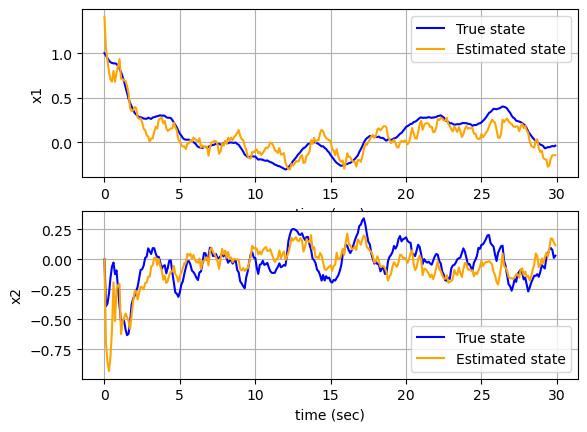

In [10]:
plt.figure()
plt.subplot(211)
plt.plot(thist,xhist[0,:-1],"b-",thist,xhathist[0,:-1],'orange')
plt.xlabel("time (sec)")
plt.ylabel("x1")
plt.legend(["True state","Estimated state"])
plt.grid(True)
plt.subplot(212)
plt.plot(thist,xhist[1,:-1],"b-",thist,xhathist[1,:-1],'orange')
plt.xlabel("time (sec)")
plt.ylabel("x2")
plt.legend(["True state","Estimated state"])
plt.grid(True)
plt.show()   

รูปที่ 8.2 เปรียบเทียบสถานะจริงกับการประมาณค่าโดย KF

สำหรับกรณีพลวัตที่เป็นแบบ LTI ค่าของเมทริกซ์ความแปรปรวนร่วมเกี่ยวและอัตราขยายคาลมานจะลู่เข้าสู่ค่าคงที่ในสถานะนิ่ง 
ดังแสดงในรูปที่ 8.3 และ 8.4

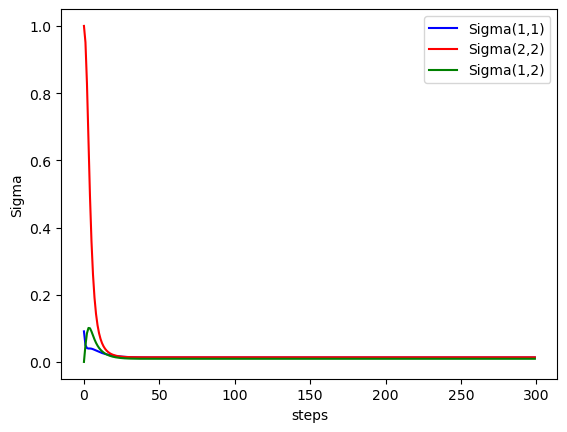

In [13]:
plt.figure()
plt.plot(sigmahist[0,0,:-1],'b-',sigmahist[1,1,:-1],'r-',sigmahist[0,1,:-1],'g-')
plt.xlabel('steps')
plt.ylabel('Sigma')
plt.legend(['Sigma(1,1)','Sigma(2,2)','Sigma(1,2)'])
plt.show()

รูปที่ 8.3 การลู่เข้าของสมาชิกเมทริกซ์ความแปรปรวนร่วมเกี่ยว

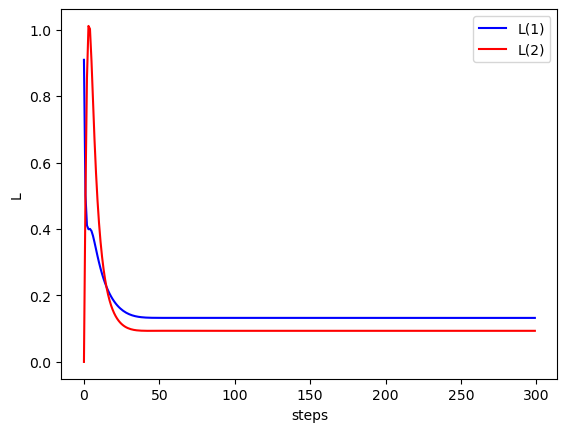

In [14]:
plt.figure()
plt.plot(lhist[0,:-1],'b-',lhist[1,:-1],'r-')
plt.xlabel('steps')
plt.ylabel('L')
plt.legend(['L(1)','L(2)'])
plt.show()

รูปที่ 8.4 การลู่เข้าของสมาชิกอัตราขยายคาลมาน

## บรรณานุกรม

1. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2025.

2. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 

3. D.G. Luenberger. Determining the State of a Linear System with Observers of Low Dynamic Order. Electrical Engineering (Ph.D. thesis). Stanford University. 1963.

4. R.E. Kalman. ["A new approach to linear filtering and prediction problems"](https://web.archive.org/web/20080529105724/http://www.elo.utfsm.cl/~ipd481/Papers%20varios/kalman1960.pdf). Journal of Basic Engineering. 82 (1): 35–45. 1960.

## โจทย์ปัญหา

8-1 แสดงรายละเอียดการอนุพัทธ์อัตราขยายคาลมาน (8.22)

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>